In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

1. Загрузите датасет 20 newsgroups;

In [2]:
trainingData = fetch_20newsgroups(subset = 'train')
testData = fetch_20newsgroups(subset = 'test')

Инициализируем векторайзер

In [3]:
vectorizer = CountVectorizer()
vectors_training = vectorizer.fit_transform(trainingData.data)

Вывод информации о датасетах

In [4]:
def show_info(item):
    print(f"Размер filenames: {item.filenames.shape}")
    print(f"Размер target: {item.target.shape}")
    
    print(f"Пример данных с target:\n{'-'*10}\n{item.target[:10]}\n{'-'*10}")
    print(f"Пример данных с data:\n{'-'*10}\n{item.data[0]}\n{'-'*10}")
    

In [5]:
show_info(testData)

Размер filenames: (7532,)
Размер target: (7532,)
Пример данных с target:
----------
[ 7  5  0 17 19 13 15 15  5  1]
----------
Пример данных с data:
----------
From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler

----------


In [6]:
show_info(trainingData)

Размер filenames: (11314,)
Размер target: (11314,)
Пример данных с target:
----------
[ 7  4  4  1 14 16 13  3  2  4]
----------
Пример данных с data:
----------
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





----------


### Обучение

In [7]:
#Импорт либ
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [8]:
#Используем векторайзер для тетовых данных
vectors_test =  vectorizer.transform(testData.data)

# Используем модель наивного байесовского для классификации текстов
model = MultinomialNB(alpha = .01)

#Обучаем модель
model.fit(vectors_training, trainingData.target)

MultinomialNB(alpha=0.01)

In [14]:
#Работаем с текстом
predicted = model.predict(vectors_test)
print("F1 macro-average : {0}".format(metrics.f1_score(testData.target, predicted, average='macro')))
print("F1 micro-average: {0}".format(metrics.f1_score(testData.target, predicted, average='micro')))
print(metrics.classification_report(testData.target, predicted))


F1 macro-average : 0.7852092132952866
F1 micro-average: 0.8039033457249071
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       319
           1       0.57      0.78      0.66       389
           2       0.75      0.04      0.07       394
           3       0.55      0.78      0.64       392
           4       0.74      0.83      0.78       385
           5       0.80      0.73      0.76       395
           6       0.79      0.85      0.82       390
           7       0.86      0.90      0.88       396
           8       0.91      0.96      0.94       398
           9       0.95      0.93      0.94       397
          10       0.96      0.96      0.96       399
          11       0.88      0.93      0.91       396
          12       0.77      0.76      0.76       393
          13       0.88      0.83      0.86       396
          14       0.87      0.89      0.88       394
          15       0.89      0.92      0.91       398
      

При многоклассовой классификации важно понимать, что есть разница между micro и macro методами<br>
<br>
<b>микро:</b> Рассчет показателей глобально, считает общее количество раз, когда каждый класс был правильно предсказан и неправильно предсказан.<br>
<br>
<b>макро:</b> Вычисляет показатель для каждого "класса" независимо и находит их невзвешенное среднее значение. При этом не учитывается дисбаланс метрик.<br>
<br>
https://github.com/turi-code/userguide/blob/master/evaluation/classification.md

Достоверность предсказания (accuracy) <b>0.79</b><br>
Точность (precision) <b>0.81</b><br>
Полнота recall <b>0.80</b><br>

In [10]:
#Матрица всех данных 
matrix = metrics.confusion_matrix(testData.target, predicted)

Text(0.5, 212.7222222222222, 'Предсказанные значения')

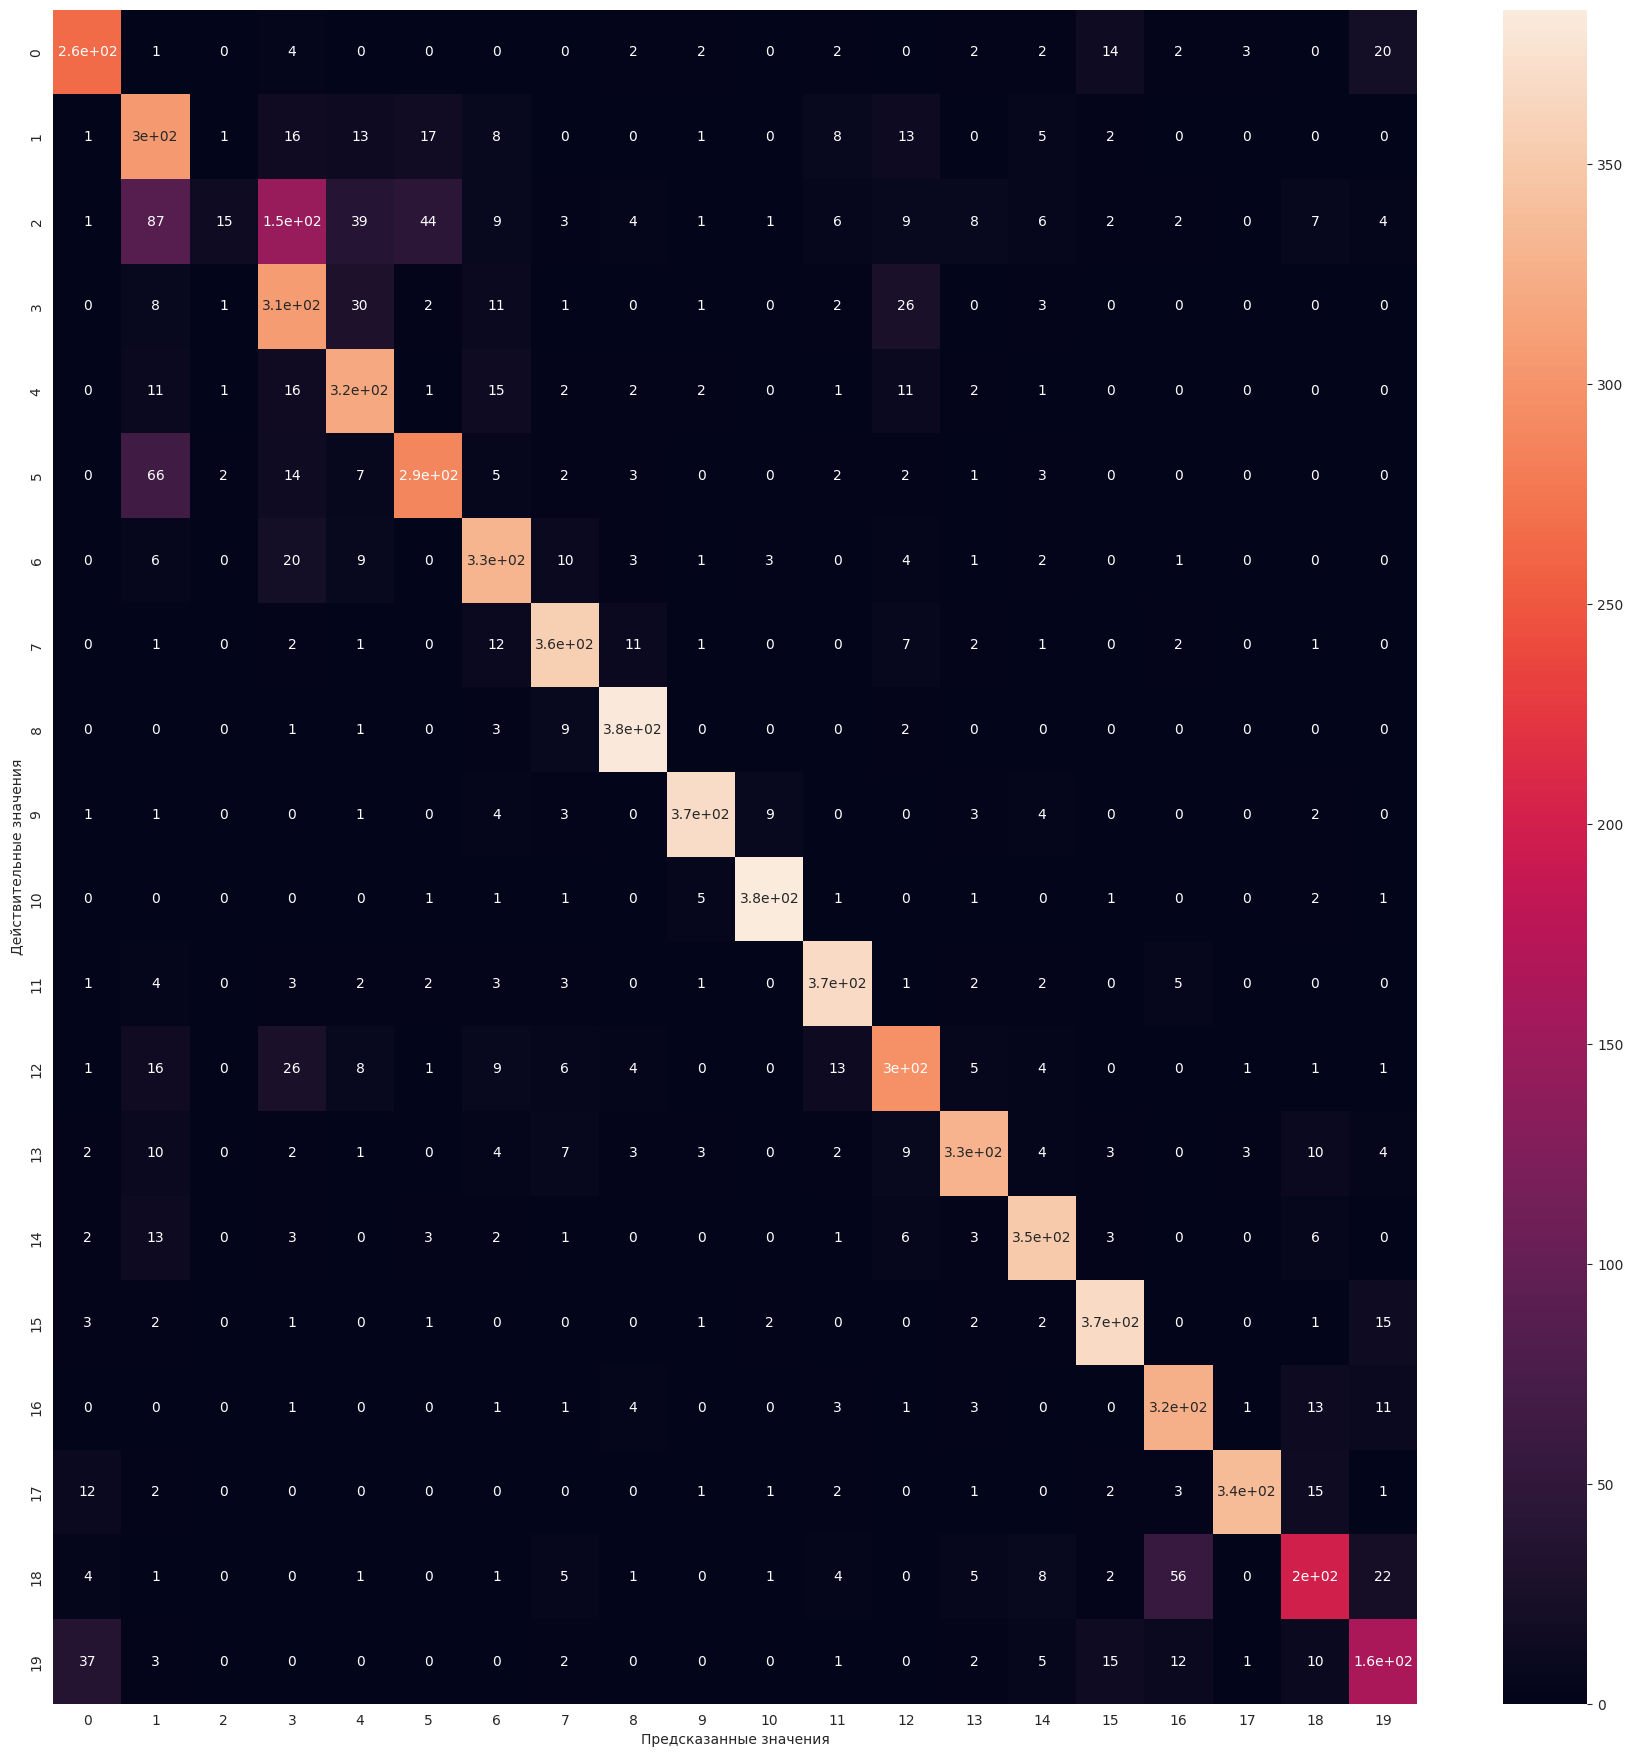

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(pd.DataFrame(matrix), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

График зависимости тестовой и обучающей эффективности от размера обучающей выборки.

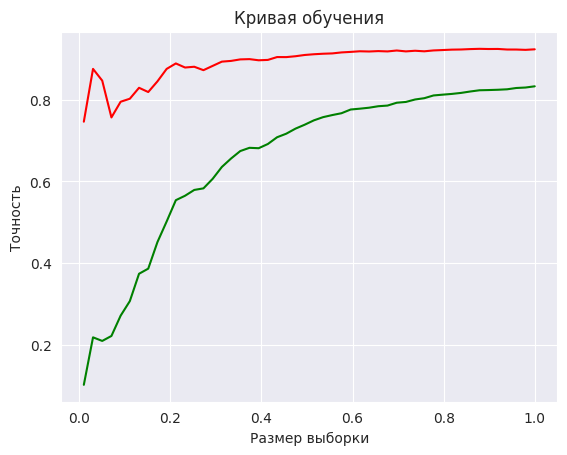

In [12]:
import numpy as np
from sklearn.model_selection import learning_curve

# Генерация кривой обучения
size_grid = np.linspace(0.01, 1.0, 50)

train_size,train_scores,validation_scores = learning_curve(MultinomialNB(), vectors_training, trainingData.target,train_sizes=size_grid, cv=5)

# Визуализация кривой обучения
plt.figure()
plt.plot(size_grid,np.average(train_scores, axis=1), color='red')
plt.plot(size_grid, np.average(validation_scores, axis=1), color='green')
plt.title('Кривая обучения')
plt.xlabel('Размер выборки')
plt.ylabel('Точность')
plt.show()

Модель можно применять на исходных данных т.к. точность классификации остатвляет около 80%